In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def simulate_gbm(initial_price, drift, volatility, num_steps, delta_t):
    # initializing a array for storying stock price path with size == steps, initialize all value to zero
    prices = np.zeros(num_steps)
    prices[0] = initial_price

    # GBM formula
    for i in range(1, num_steps):
        epsilon = np.random.normal(0, 1)  # Generate a random number from a standard normal distribution
        drift_component = drift * delta_t  # Drift component of the price change (mu * dt)
        volatility_component = volatility * epsilon * np.sqrt(delta_t)  
        # Volatility component of the price change (sigma * DW, where DW = random variable of standard deviation)
        rateof_price_change = drift_component + volatility_component  # Total price change (dS/S)
        prices[i] = prices[i-1] * np.exp(rateof_price_change)  # Update the price by adding the price change

    return prices

In [4]:
def multiPathSim(path):
    # Simulate GBM paths
    paths = np.zeros((path, num_steps))
    for i in range(num_paths):
        paths[i] = simulate_gbm(initial_price, drift, volatility, num_steps, delta_t)

In [19]:
snp = pd.read_csv("data/SPXall.csv")

In [20]:
snp = snp[['Date', 'Close']]
snp

,Date,Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000
...,...,...
24220,2024-06-03,5283.399902
24221,2024-06-04,5291.339844
24222,2024-06-05,5354.029785
24223,2024-06-06,5352.959961


In [22]:
# TODO: wrap it to a function

start_date, end_date = pd.to_datetime("1999-06-01"), pd.to_datetime("2024-06-01")
snp["Date"] = pd.to_datetime(snp["Date"])
timefilter = (snp["Date"] >= start_date) & (snp["Date"] <= end_date)
snp = snp[timefilter].reset_index(drop = True)
snp

C:\Users\chanj\AppData\Local\Temp\ipykernel_17108\254871849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp["Date"] = pd.to_datetime(snp["Date"])


,Date,Close
0,1999-06-01,1294.260010
1,1999-06-02,1294.810059
2,1999-06-03,1299.540039
3,1999-06-04,1327.750000
4,1999-06-07,1334.520020
...,...,...
6287,2024-05-24,5304.720215
6288,2024-05-28,5306.040039
6289,2024-05-29,5266.950195
6290,2024-05-30,5235.479980


In [ ]:
# In the Journal of Forecasting paper (page 8), the mean daily return (mu) of SPX is neglected
# Therefore we set mu as 0 in the following
mu = 0

# TODO: GARCH model

In [4]:
# Parameters

# TODO: Change to S&P parameters (mu -> data; sigma -> GARCH)
initial_price = 100.0
drift = 0.08  # Drift (average return)
volatility = 0.2  # Volatility (standard deviation of returns)
num_steps = 252  # Number of time steps (e.g., trading days in a year)
delta_t = 1/252  # Length of time interval (e.g., 1 trading day)
num_paths = 3  # Number of paths to simulate

# Simulate GBM paths
paths = np.zeros((num_paths, num_steps))
for i in range(num_paths):
    paths[i] = simulate_gbm(initial_price, drift, volatility, num_steps, delta_t)



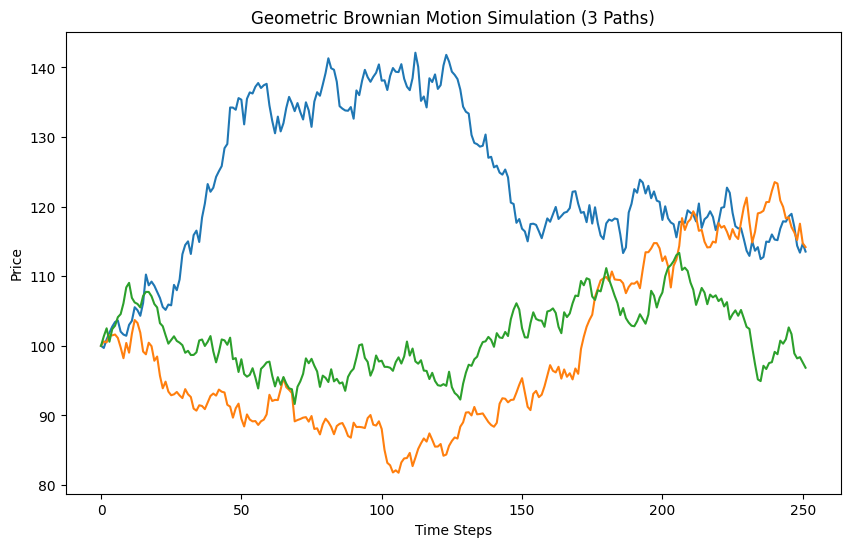

In [5]:
# Plot the simulated price paths
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(paths[i])
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('Geometric Brownian Motion Simulation ({} Paths)'.format(num_paths))
plt.show()